# Tax Revenue Per Capita

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
co_df = pd.read_csv("../state_tax_collection/co_tax_collection.csv")

In [3]:
co_df = co_df.iloc[80:]

In [4]:
revenue_values = co_df["dollars (millions)"].tolist()

In [5]:
def get_total():
    years_totals = []
    quarter_1 = 0
    quarter_2 = 1
    quarter_3 = 2
    quarter_4 =3
    count = 1
    while count <= 8:  
        total = revenue_values[quarter_1] + revenue_values[quarter_2] + revenue_values[quarter_3] + revenue_values[quarter_4]
        years_totals.append(total)
        
        quarter_1 += 4
        quarter_2 += 4
        quarter_3 += 4
        quarter_4 += 4
        count += 1
    return years_totals

In [6]:
totals = get_total()

In [7]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "tax_revenue": totals}
co_tax_year = pd.DataFrame(data)

## converting the millions unit

In [8]:
tax = co_tax_year["tax_revenue"].tolist()

In [9]:
def actual_total():
    tax_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = tax[value]*1000000
        tax_total.append(total)
        value += 1
        count += 1
    return tax_total

In [10]:
act_tax = actual_total()

In [11]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "tax_revenue": act_tax}
co_tax_year = pd.DataFrame(data)

## colorado population

In [12]:
pop_df = pd.read_csv("../state_pop/colorado_pop_cleaned.csv")
pop_df = pop_df.iloc[114:]

In [13]:
colorado_pop = pop_df["colorado_pop"].tolist()

In [14]:
def actual_pop():
    pop_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = colorado_pop[value]*1000
        pop_total.append(total)
        value += 1
        count += 1
    return pop_total

In [15]:
act_pop = actual_pop()

In [16]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "population": act_pop}
co_pop_year = pd.DataFrame(data)

## Merging both ds

In [17]:
merged_df = pd.merge(co_tax_year, co_pop_year, how="outer", on=["year"])
# merged_df

## Finding tax revenue per capita

In [18]:
population_list = merged_df.population.to_list()

tax_list = merged_df.tax_revenue.to_list()

per_capita_list = []

#function to divide tax revenue by population

def per_capita():

    for population, tax_revenue in zip(population_list, tax_list):

        per_capita_list.append((tax_revenue/population))
        
    return per_capita_list

In [19]:
per_capita_list = per_capita()

In [20]:
capita_data = {"tax_per_capita": per_capita_list}
capita_column = pd.DataFrame(capita_data)

In [21]:
merged_df.insert(3, "tax_per_capita", capita_column, True)

In [22]:
merged_df = pd.DataFrame(merged_df)

## MJ tax revenue

In [23]:
co_mj_tax = pd.read_csv("../marijuana_tax/colorado_marijuana_cleaned.csv")
co_mj_tax = pd.DataFrame(co_mj_tax)

In [24]:
co_mj_tax = co_mj_tax.loc[{12, 25, 38, 51, 64, 77, 90, 103}]

In [25]:
co_mj_tax = co_mj_tax.sort_index()

In [26]:
co_mj_tax = pd.DataFrame(co_mj_tax)
co_mj_tax = co_mj_tax.reset_index()

In [27]:
mj_tax_revenue = co_mj_tax["total_taxes_and_fees"]

## Merging DS

In [28]:
merged_df = merged_df.join(mj_tax_revenue)
merged_df

,year,tax_revenue,population,tax_per_capita,total_taxes_and_fees
0,2014,12333000000,5352637.0,2304.097961,"$67,594,323"
1,2015,12927000000,5454328.0,2370.044486,"$130,411,173"
2,2016,12931000000,5543844.0,2332.497090,"$193,604,810"
3,2017,13850000000,5617421.0,2465.544242,"$247,368,473"
4,2018,15226000000,5697155.0,2672.562007,"$266,529,637"
5,2019,15392000000,5758486.0,2672.924793,"$302,458,426"
6,2020,15701000000,5784308.0,2714.412856,"$387,480,110"
7,2021,17931000000,5812069.0,3085.131990,"$423,486,053"


## Plotting data

In [29]:
co_plot_df2 = merged_df.drop(columns=["tax_revenue","population"])

In [31]:
co_plot_df2 = co_plot_df2.rename(columns = {"total_taxes_and_fees":"mj_tax_revenue"})

In [33]:
co_plot_df2.replace({'\$':'', '\,':'', '\(':'', '\)':''}, regex = True, inplace= True)

In [35]:
co_plot_df2['mj_tax_revenue'] = co_plot_df2['mj_tax_revenue'].astype(str).astype(int)

<AxesSubplot:xlabel='mj_tax_revenue', ylabel='tax_per_capita'>

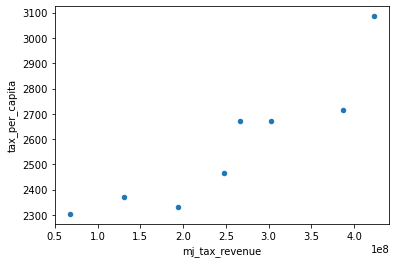

In [36]:
co_plot_df2.plot.scatter(y="tax_per_capita", x="mj_tax_revenue") 